In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("Unemployment in India.csv")
df

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [6]:
# Missing Values/Null Values Count
df.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [7]:
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [8]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


# Data Wrangling

In [9]:
# Rename the columns of the DataFrame
df.columns = ['States', 'Date', 'Frequency', 'Estimated Unemployment Rate', 'Estimated Employed', 'Estimated Labour Participation Rate', 'Region']
df

,States,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Region
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# Convert the 'Date' column to datetime format, specifying 'dayfirst' to handle date formats with day first
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Extract the month from the 'Date' column and create a new 'Month' column
df['Month'] = df['Date'].dt.month

# Create a new 'Month_int' column by converting the 'Month' column to integers, handling missing values
df['Month_int'] = df['Month'].apply(lambda x: int(x) if pd.notna(x) else x)
     

# Drop the 'Month' column from the DataFrame
df.drop(columns='Month', inplace=True)
df

,States,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Region,Month_int
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,5.0
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,6.0
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,7.0
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural,8.0
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural,9.0
...,...,...,...,...,...,...,...,...
763,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# Lets create a copy of the dataset for the data of during lockdown period
df_ld = df.copy()

# Drop all the missing values from 'df' dataset
df=df.dropna()
     

# Define a date range mask to filter rows where 'Date' falls within the range of before lockdown period
mask = (df['Date'] >= '2019-05-31') & (df['Date'] <= '2020-03-31')

# Use the mask to select and keep only the rows that meet the date range criteria
df = df.loc[mask]
     

# Define a date range mask to filter rows where 'Date' falls within the range of during lockdown period
mask = (df_ld['Date'] >= '2020-04-30')

# Use the mask to select and keep only the rows that meet the date range criteria
df_ld = df_ld.loc[mask]
     

# Data Vizualization

Chart - 1 : Region Wise Estimated Unemployment Rate

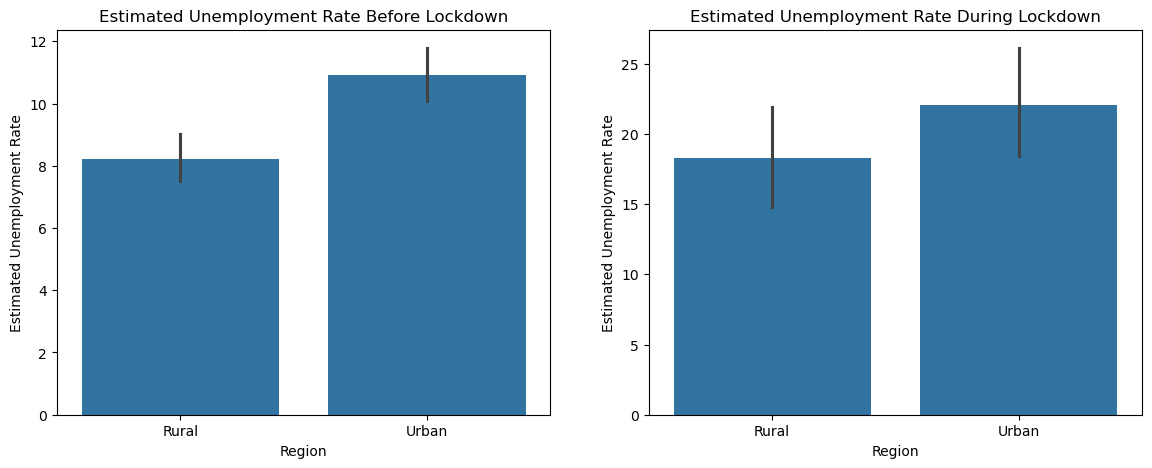

In [13]:
plt.figure(figsize=(14, 5))

# Subplot 1: Estimated Unemployment Rate Before Lockdown
plt.subplot(1, 2, 1)
sns.barplot(x='Region', y='Estimated Unemployment Rate', data=df)
plt.xlabel("Region", fontsize=10)
plt.ylabel('Estimated Unemployment Rate', fontsize=10)
plt.title('Estimated Unemployment Rate Before Lockdown', fontsize=12)

# Subplot 2: Estimated Unemployment Rate During Lockdown
plt.subplot(1, 2, 2)
sns.barplot(x='Region', y='Estimated Unemployment Rate', data=df_ld)
plt.xlabel("Region", fontsize=10)
plt.ylabel('Estimated Unemployment Rate', fontsize=10)
plt.title('Estimated Unemployment Rate During Lockdown', fontsize=12)
plt.show()

Chart - 2 : Swarm Plot for State Wise Estimated Unemployment Rate

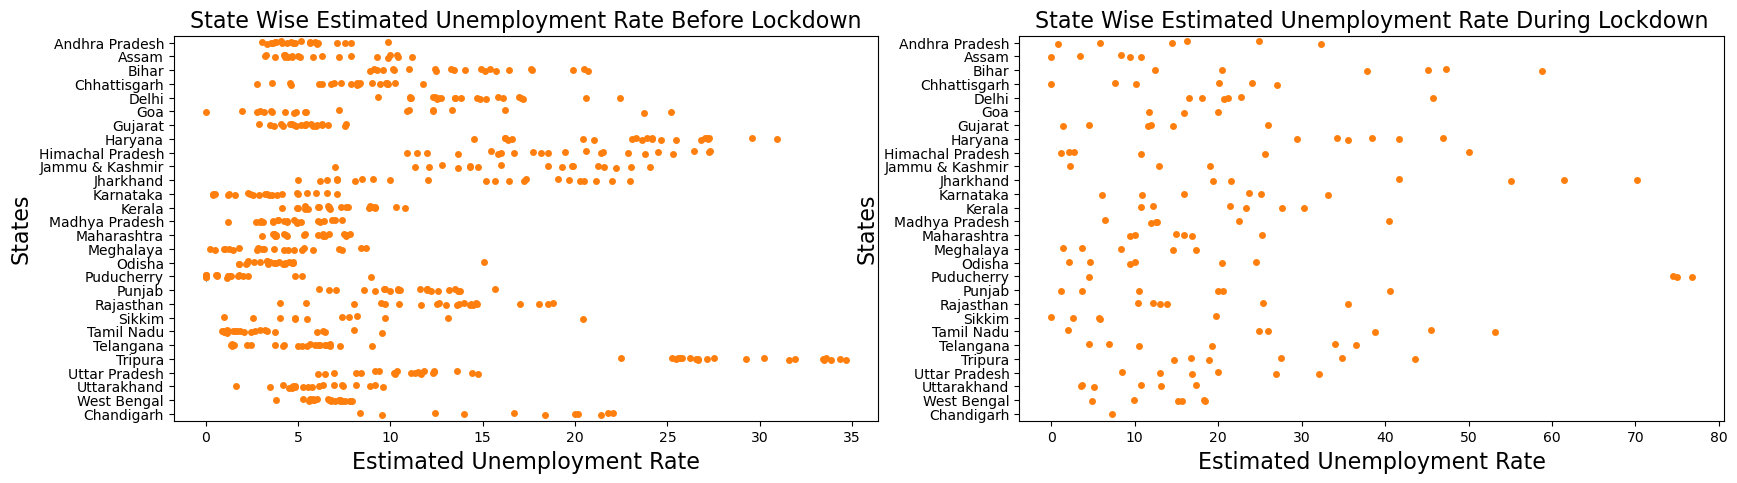

In [23]:
plt.figure(figsize=(20, 5))

# Subplot 2: Estimated Unemployment Rate During Lockdown
plt.subplot(1, 2, 1)

# Set the title for the first subplot.
plt.title("State Wise Estimated Unemployment Rate Before Lockdown", fontsize=16)

# Create a swarm plot to visualize the Estimated Unemployment Rate before lockdown.
sns.swarmplot(y="States", x='Estimated Unemployment Rate', data=df, size=1, dodge=True, alpha=0.6)
sns.stripplot(y="States", x='Estimated Unemployment Rate', data=df, jitter=True)
plt.xlabel("Estimated Unemployment Rate", fontsize=16)
plt.ylabel("States", fontsize=16)

# Subplot 2: Estimated Unemployment Rate During Lockdown
plt.subplot(1, 2, 2)

# Set the title for the second subplot.
plt.title("State Wise Estimated Unemployment Rate During Lockdown", fontsize=16)

# Create a swarm plot to visualize the Estimated Unemployment Rate during lockdown.
sns.swarmplot(y="States", x='Estimated Unemployment Rate', data=df_ld, size=1, dodge=True, alpha=0.6)
sns.stripplot(y="States", x='Estimated Unemployment Rate', data=df_ld, jitter=True)
plt.xlabel("Estimated Unemployment Rate", fontsize=16)
plt.ylabel("States", fontsize=16)

# Display the subplots side by side.
plt.show()

Chart - 3 : Bar Plot for State Wise Estimated Unemployment Rate

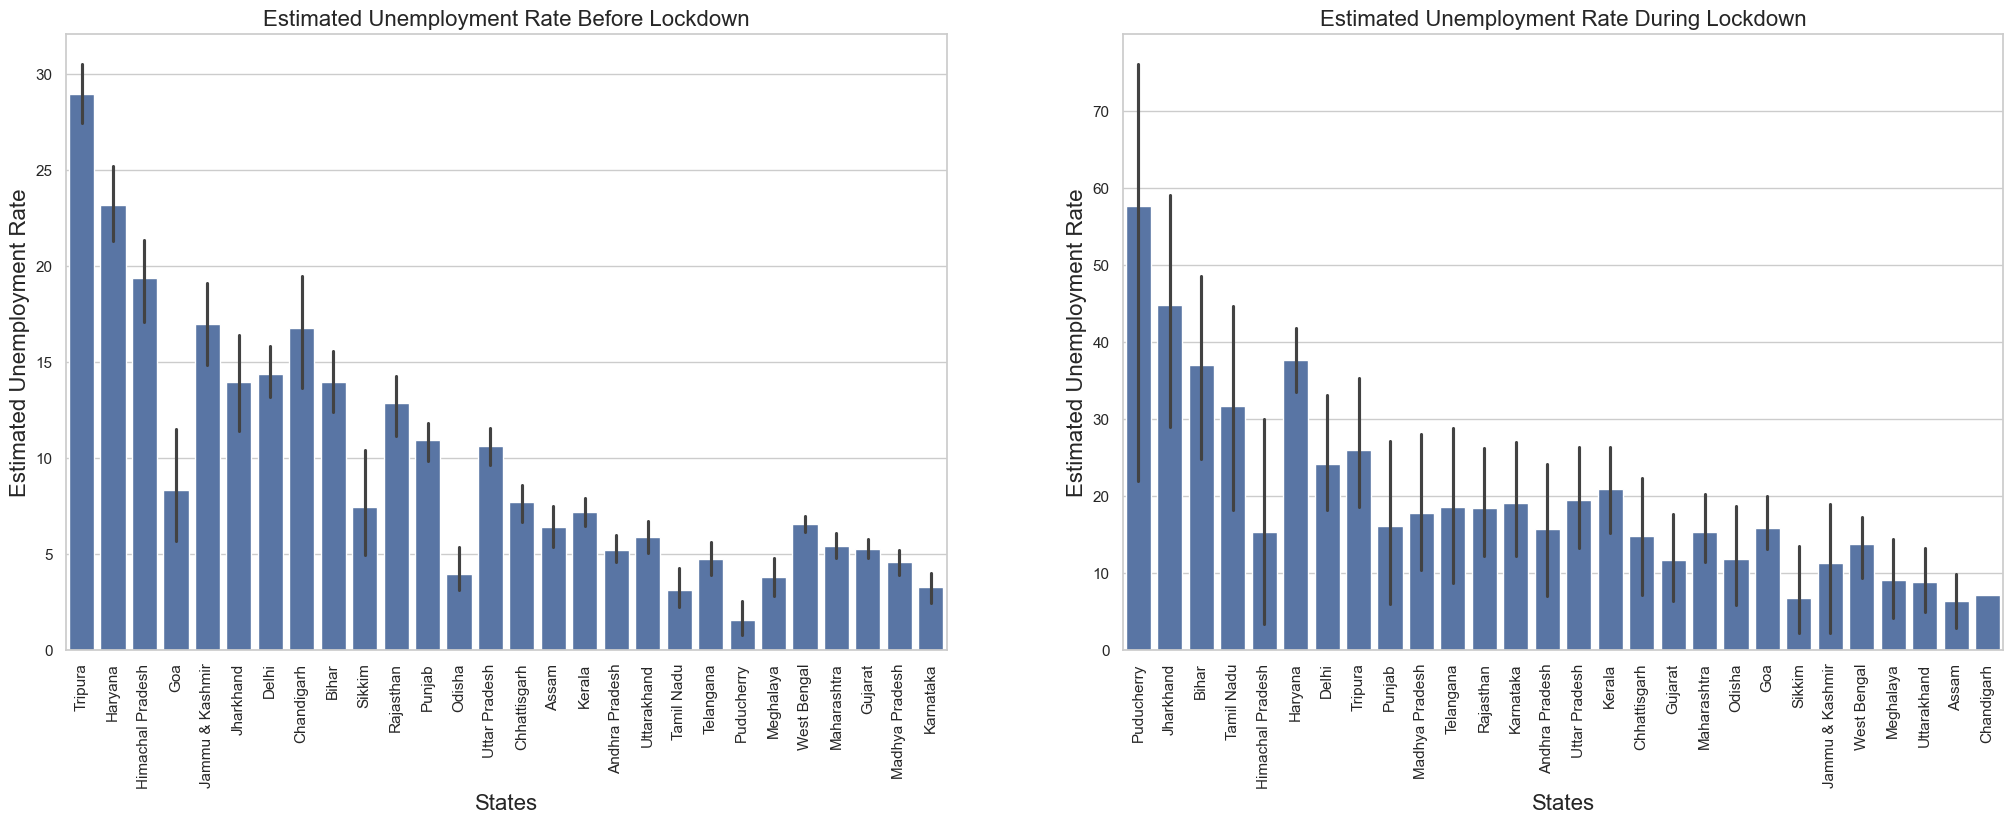

In [31]:

rainbow_palette = sns.color_palette("rainbow", len(df))
sns.set_theme(style="whitegrid")
plt.figure(figsize=(25, 8))

# Subplot 1: Estimated Unemployment Rate Before Lockdown
plt.subplot(1, 2, 1)
plt.title("Estimated Unemployment Rate Before Lockdown", fontsize=16)
sns.set_color_codes("muted")
sns.barplot(data=df.sort_values(by='Estimated Unemployment Rate', ascending=False), x="States", y="Estimated Unemployment Rate")
plt.xticks(rotation=90)
plt.xlabel('States', fontsize=16)
plt.ylabel('Estimated Unemployment Rate', fontsize=16)

# Subplot 2: Estimated Unemployment Rate During Lockdown
plt.subplot(1, 2, 2)
plt.title("Estimated Unemployment Rate During Lockdown", fontsize=16)
sns.set_color_codes("muted")
sns.barplot(data=df_ld.sort_values(by='Estimated Unemployment Rate', ascending=False), x="States", y="Estimated Unemployment Rate")
plt.xticks(rotation=90)
plt.xlabel('States', fontsize=16)
plt.ylabel('Estimated Unemployment Rate', fontsize=16)

# Display the subplots side by side.
plt.show()